In [20]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install distutils


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd 
import pickle 
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
import pandas as pd

train_data = pd.read_csv("train.txt", header=None, sep=';', names=['Comment','Emotion'], encoding='utf-8')


In [12]:
train_data

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [16]:
train_data['length']=[len(x) for x in train_data['Comment']]

In [17]:
train_data


,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [18]:
train_data.shape

(16000, 3)

In [19]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [20]:
train_data.duplicated().sum()


1

In [21]:
train_data.drop_duplicates(inplace=True)

In [22]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

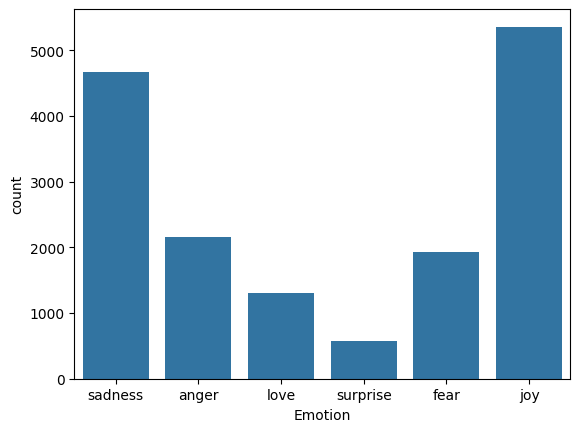

In [24]:
sns.countplot(x=train_data['Emotion'])
plt.show()

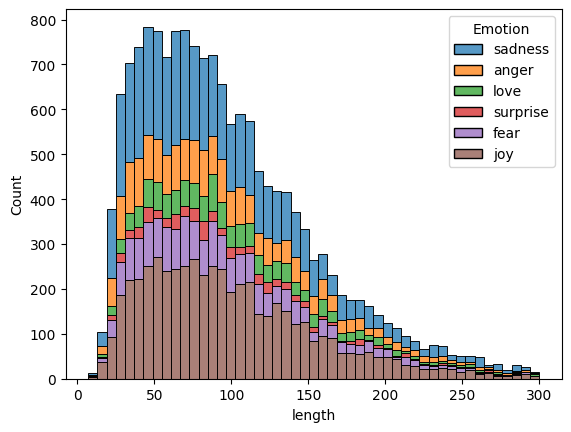

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2['length'] is the column you want to plot
sns.histplot(data=df2, x='length', hue='Emotion', multiple='stack')
plt.show()



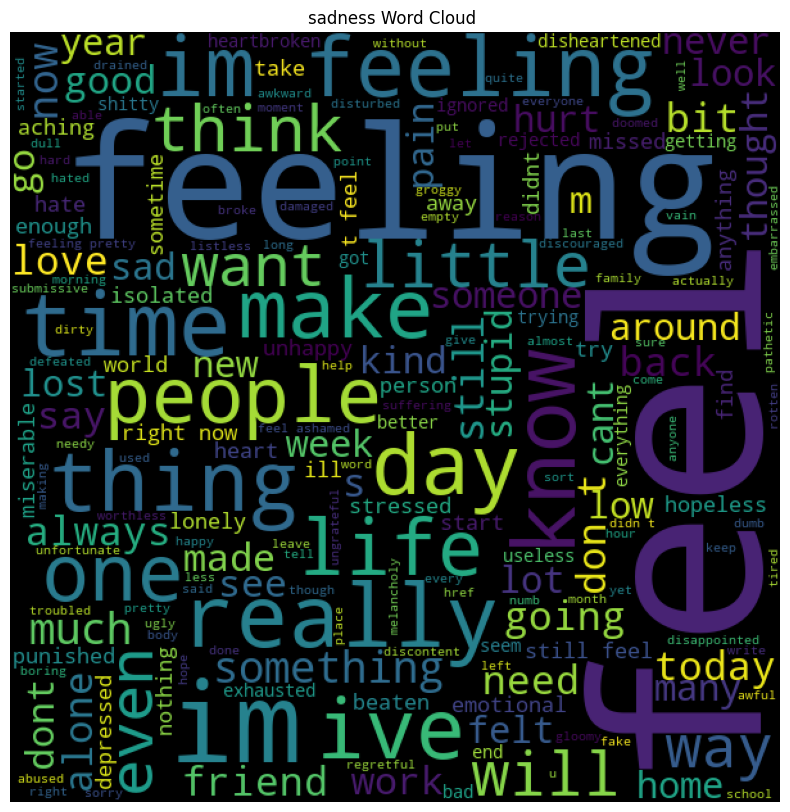

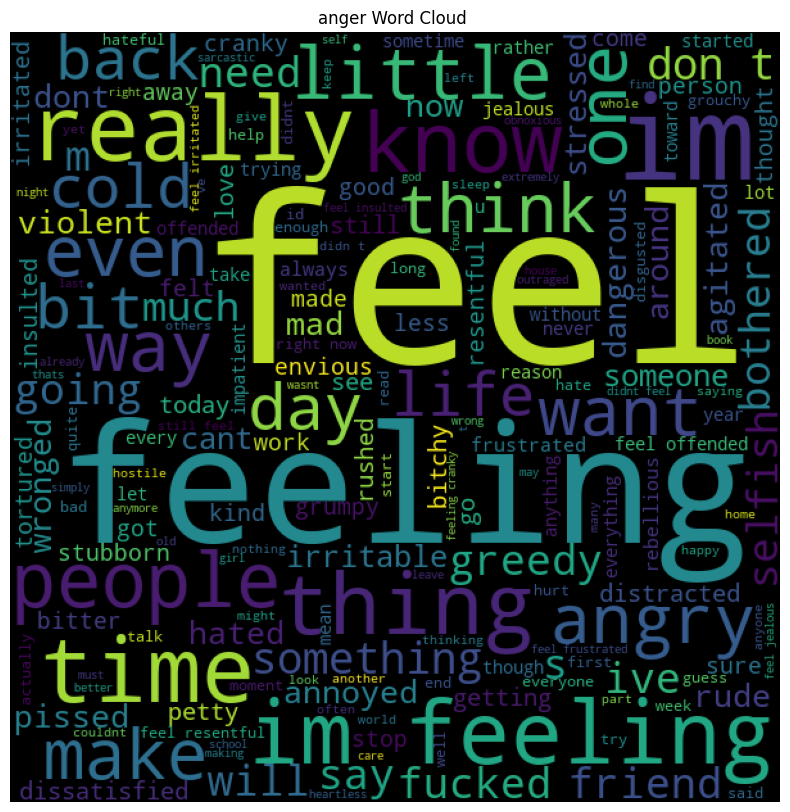

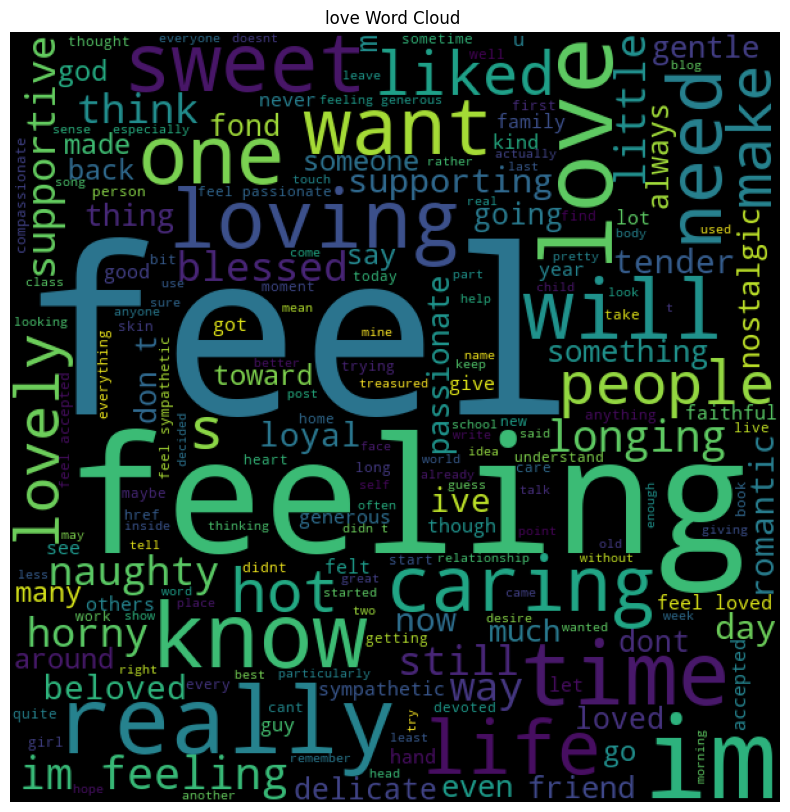

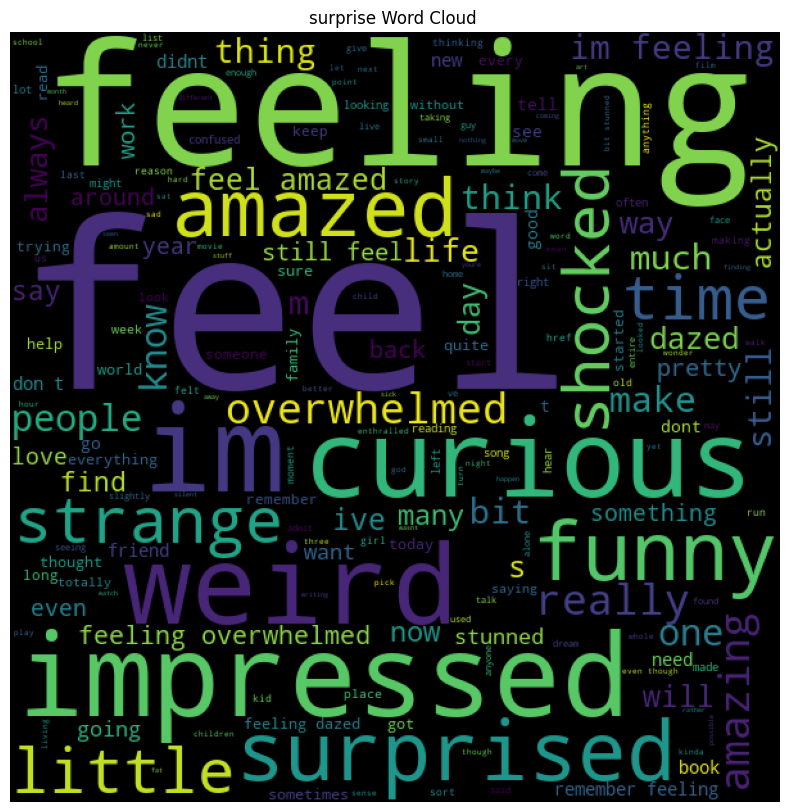

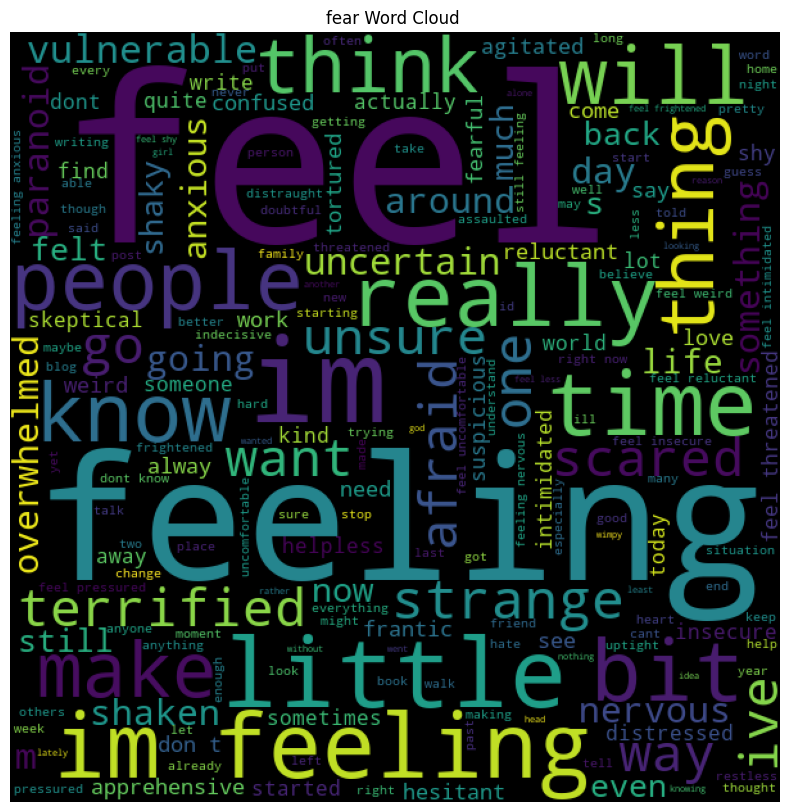

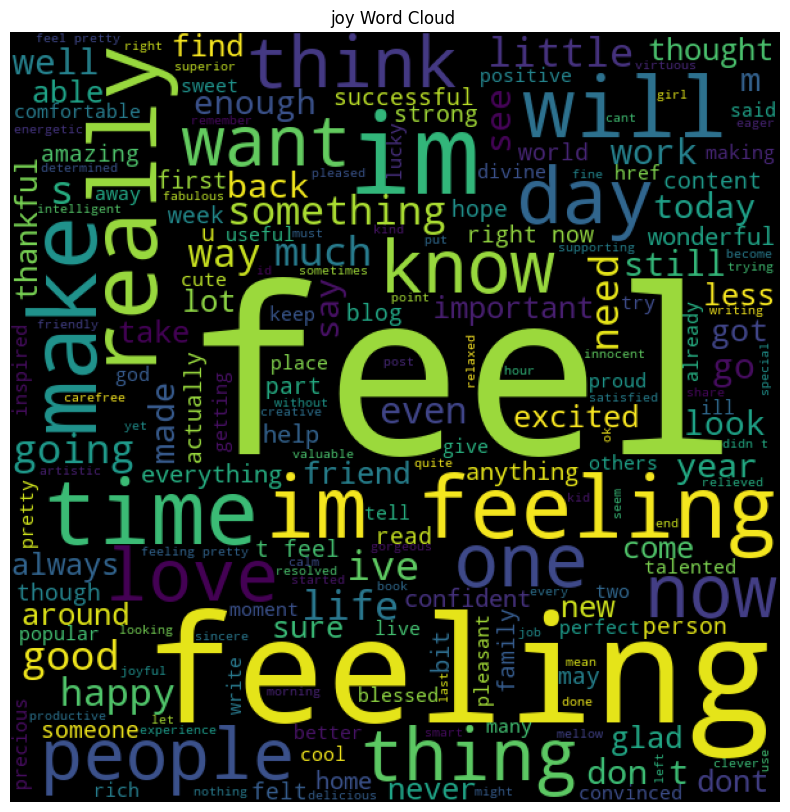

In [42]:
def words_cloud(wordcloud,emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion + " Word Cloud ")
    plt.imshow(wordcloud)
    plt.axis("off")
    
emotions_list= train_data['Emotion'].unique()
for emotion in emotions_list:
    text=" ".join([senetence for senetence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    wordcloud=WordCloud(width=600, height=600).generate(text)
    words_cloud(wordcloud,emotion)